# Experiment 1: Using all photos, frontalized

### Training

We first import the required libraries, and set up the model, dataloaders and optimizer for training

In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

from model import Generator
from dataset import EmbedImagePairs
from train import train, test, synthesize

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
model = Generator(128).to(device)

trn_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/train_all', size=64, n_hidden=128), batch_size=300, shuffle=True, num_workers=4)
val_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/val', size=64, n_hidden=128, train=False), batch_size=100)
dataloader_dict = {'train': trn_dataloader, 'val': val_dataloader}

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

We create a folder to store all the outputs of this training run

In [4]:
# uncomment if the folder already exists to remove it
# !rm -r "models/pytorch/128_all" 
!mkdir -p "models/pytorch/128_all"

We install dlib if it's not installed already, and get the required models

In [5]:
# uncomment out if you want to compute validation metrics using dlib
# !pip install dlib

!mkdir -p "models/dlib"

!wget "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2" -O "models/dlib/facerec.dat.bz2"
!wget "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2" -O "models/dlib/facelandmarks.dat.bz2"

!bzip2 -d "models/dlib/facerec.dat.bz2"
!bzip2 -d "models/dlib/facelandmarks.dat.bz2"

--2019-01-23 07:03:19--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘models/dlib/facerec.dat.bz2’

models/dlib/facerec 100%[===================>]  20.44M  9.78MB/s    in 2.1s    

2019-01-23 07:03:22 (9.78 MB/s) - ‘models/dlib/facerec.dat.bz2’ saved [21428389/21428389]

--2019-01-23 07:03:22--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘models/dlib/facelandmarks.dat.bz2’

models/dlib/facelan 100%[===================>]   5.44M  4.90MB/s    in 1.1s    

2019-01-23 07:03:23 (4.90 MB/s) - ‘models/dlib/facelandmarks.dat.bz2’ saved [5706710/5706710]



In [6]:
import dlib

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('models/dlib/facelandmarks.dat')
face_embedder = dlib.face_recognition_model_v1('models/dlib/facerec.dat')

dlib_models = [face_detector, landmark_detector, face_embedder]

We train the model for 150 epochs, performing a validation run every 5 epochs

In [7]:
num_epochs=150
validate_every=5

train(model, dataloader_dict, criterion, optimizer, device, out_name='models/pytorch/128_all/model', 
      dlib_models=dlib_models, validate=True, validate_every=validate_every, num_epochs=num_epochs)

  3%|▎         | 4/150 [00:45<27:29, 11.30s/it]

saving at epoch 5


  3%|▎         | 5/150 [00:58<28:37, 11.85s/it]

Epoch:  5 Train Loss: 0.027287773141561736 Val Loss: 0.09109160976599803 Average Distance: 0.5713707561927732


  6%|▌         | 9/150 [01:43<26:57, 11.47s/it]

saving at epoch 10


  7%|▋         | 10/150 [01:56<28:01, 12.01s/it]

Epoch:  10 Train Loss: 0.023420921732948942 Val Loss: 0.09610499421843385 Average Distance: 0.5062030260278806


  9%|▉         | 14/150 [02:42<25:58, 11.46s/it]

saving at epoch 15


 10%|█         | 15/150 [02:55<27:02, 12.02s/it]

Epoch:  15 Train Loss: 0.019853907285091257 Val Loss: 0.10139154365896123 Average Distance: 0.5018715467717598


 13%|█▎        | 19/150 [03:40<25:00, 11.46s/it]

saving at epoch 20


 13%|█▎        | 20/150 [03:53<25:58, 11.99s/it]

Epoch:  20 Train Loss: 0.016258368849938518 Val Loss: 0.09940781510245483 Average Distance: 0.5011488538907847


 16%|█▌        | 24/150 [04:39<24:08, 11.50s/it]

saving at epoch 25


 17%|█▋        | 25/150 [04:52<24:56, 11.97s/it]

Epoch:  25 Train Loss: 0.01351321541660184 Val Loss: 0.10220719320056713 Average Distance: 0.5000056904705739


 19%|█▉        | 29/150 [05:37<23:09, 11.48s/it]

saving at epoch 30


 20%|██        | 30/150 [05:50<24:01, 12.01s/it]

Epoch:  30 Train Loss: 0.011982007331602472 Val Loss: 0.10785887007955956 Average Distance: 0.4939158492349874


 23%|██▎       | 34/150 [06:36<22:12, 11.49s/it]

saving at epoch 35


 23%|██▎       | 35/150 [06:49<22:53, 11.94s/it]

Epoch:  35 Train Loss: 0.010248966041765532 Val Loss: 0.10369418139478802 Average Distance: 0.5051742111636731


 26%|██▌       | 39/150 [07:34<21:17, 11.51s/it]

saving at epoch 40


 27%|██▋       | 40/150 [07:47<21:59, 12.00s/it]

Epoch:  40 Train Loss: 0.00903721221454578 Val Loss: 0.09958602178149518 Average Distance: 0.4996741442358829


 29%|██▉       | 44/150 [08:33<20:21, 11.52s/it]

saving at epoch 45


 30%|███       | 45/150 [08:46<21:03, 12.03s/it]

Epoch:  45 Train Loss: 0.008271761593438325 Val Loss: 0.09913321353692923 Average Distance: 0.5050976176998356


 33%|███▎      | 49/150 [09:31<19:16, 11.45s/it]

saving at epoch 50


 33%|███▎      | 50/150 [09:44<19:59, 12.00s/it]

Epoch:  50 Train Loss: 0.007621788404065525 Val Loss: 0.10264672240061043 Average Distance: 0.5012035757179991


 36%|███▌      | 54/150 [10:30<18:25, 11.52s/it]

saving at epoch 55


 37%|███▋      | 55/150 [10:43<19:03, 12.04s/it]

Epoch:  55 Train Loss: 0.006936654431906128 Val Loss: 0.10928215897452515 Average Distance: 0.5023977201763227


 39%|███▉      | 59/150 [11:28<17:23, 11.47s/it]

saving at epoch 60


 40%|████      | 60/150 [11:41<18:01, 12.02s/it]

Epoch:  60 Train Loss: 0.006669764943369528 Val Loss: 0.10016177990267762 Average Distance: 0.5044327592477645


 43%|████▎     | 64/150 [12:27<16:23, 11.44s/it]

saving at epoch 65


 43%|████▎     | 65/150 [12:40<16:53, 11.92s/it]

Epoch:  65 Train Loss: 0.006380308661206986 Val Loss: 0.11339886361255055 Average Distance: 0.5030344494998489


 46%|████▌     | 69/150 [13:25<15:28, 11.46s/it]

saving at epoch 70


 47%|████▋     | 70/150 [13:38<15:56, 11.96s/it]

Epoch:  70 Train Loss: 0.006542610669110545 Val Loss: 0.10374670957042052 Average Distance: 0.5031959498553719


 49%|████▉     | 74/150 [14:24<14:37, 11.55s/it]

saving at epoch 75


 50%|█████     | 75/150 [14:37<15:03, 12.05s/it]

Epoch:  75 Train Loss: 0.005948321321115362 Val Loss: 0.10727472926399349 Average Distance: 0.5130856587709753


 53%|█████▎    | 79/150 [15:22<13:37, 11.52s/it]

saving at epoch 80


 53%|█████▎    | 80/150 [15:35<13:58, 11.97s/it]

Epoch:  80 Train Loss: 0.006271429102232939 Val Loss: 0.10016011519242177 Average Distance: 0.5035025273761332


 56%|█████▌    | 84/150 [16:21<12:39, 11.51s/it]

saving at epoch 85


 57%|█████▋    | 85/150 [16:34<12:59, 12.00s/it]

Epoch:  85 Train Loss: 0.00580368123971597 Val Loss: 0.10204232615970932 Average Distance: 0.4996820309406333


 59%|█████▉    | 89/150 [17:19<11:38, 11.46s/it]

saving at epoch 90


 60%|██████    | 90/150 [17:32<11:58, 11.98s/it]

Epoch:  90 Train Loss: 0.0060817337638537135 Val Loss: 0.10914058772336065 Average Distance: 0.49792070179791714


 63%|██████▎   | 94/150 [18:17<10:41, 11.45s/it]

saving at epoch 95


 63%|██████▎   | 95/150 [18:31<11:01, 12.03s/it]

Epoch:  95 Train Loss: 0.005471603357369695 Val Loss: 0.10359889189753912 Average Distance: 0.5082637190326569


 66%|██████▌   | 99/150 [19:16<09:46, 11.50s/it]

saving at epoch 100


 67%|██████▋   | 100/150 [19:29<09:58, 11.97s/it]

Epoch:  100 Train Loss: 0.005265343959534256 Val Loss: 0.1048948154908366 Average Distance: 0.5021974211871534


 69%|██████▉   | 104/150 [20:15<08:47, 11.47s/it]

saving at epoch 105


 70%|███████   | 105/150 [20:28<08:59, 11.99s/it]

Epoch:  105 Train Loss: 0.005125121146640628 Val Loss: 0.10003862991533448 Average Distance: 0.5094682916955312


 73%|███████▎  | 109/150 [21:13<07:53, 11.55s/it]

saving at epoch 110


 73%|███████▎  | 110/150 [21:26<08:01, 12.04s/it]

Epoch:  110 Train Loss: 0.004986837347236663 Val Loss: 0.10671445925151353 Average Distance: 0.5067425324615243


 76%|███████▌  | 114/150 [22:11<06:52, 11.46s/it]

saving at epoch 115


 77%|███████▋  | 115/150 [22:25<06:59, 11.99s/it]

Epoch:  115 Train Loss: 0.0049111959330749985 Val Loss: 0.10483819681458768 Average Distance: 0.5040576880514134


 79%|███████▉  | 119/150 [23:10<05:55, 11.46s/it]

saving at epoch 120


 80%|████████  | 120/150 [23:23<06:00, 12.00s/it]

Epoch:  120 Train Loss: 0.005163446708978823 Val Loss: 0.10306587169128181 Average Distance: 0.5096843692592445


 83%|████████▎ | 124/150 [24:08<04:58, 11.46s/it]

saving at epoch 125


 83%|████████▎ | 125/150 [24:22<05:00, 12.02s/it]

Epoch:  125 Train Loss: 0.004887631557269068 Val Loss: 0.10421127338061291 Average Distance: 0.5025150069824478


 86%|████████▌ | 129/150 [25:07<04:01, 11.50s/it]

saving at epoch 130


 87%|████████▋ | 130/150 [25:20<04:00, 12.04s/it]

Epoch:  130 Train Loss: 0.004894331717451479 Val Loss: 0.10267182149454555 Average Distance: 0.5065241673188329


 89%|████████▉ | 134/150 [26:05<03:02, 11.43s/it]

saving at epoch 135


 90%|█████████ | 135/150 [26:19<03:00, 12.01s/it]

Epoch:  135 Train Loss: 0.004759327804708257 Val Loss: 0.09942710847981208 Average Distance: 0.5080977040108785


 93%|█████████▎| 139/150 [27:04<02:06, 11.50s/it]

saving at epoch 140


 93%|█████████▎| 140/150 [27:17<02:00, 12.00s/it]

Epoch:  140 Train Loss: 0.004646583579481533 Val Loss: 0.1048034117021392 Average Distance: 0.507496396787925


 96%|█████████▌| 144/150 [28:03<01:09, 11.56s/it]

saving at epoch 145


 97%|█████████▋| 145/150 [28:16<01:00, 12.02s/it]

Epoch:  145 Train Loss: 0.00475317177090228 Val Loss: 0.10530451157715469 Average Distance: 0.5039897957065981


 99%|█████████▉| 149/150 [29:01<00:11, 11.46s/it]

saving at epoch 150


100%|██████████| 150/150 [29:14<00:00, 11.95s/it]

Epoch:  150 Train Loss: 0.004625215051004573 Val Loss: 0.10709610337440946 Average Distance: 0.5062953733859166
saving at epoch 150


### Evaluating

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

We load in the training losses, and validation metrics sved during training

In [9]:
trn_losses = np.load('models/pytorch/128_all/modeltrn_losses.npy')
avg_dists = np.load('models/pytorch/128_all/modelavg_dists.npy')

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'average distance (validation)'))

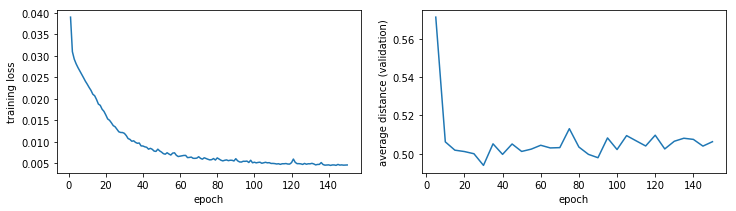

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12, 3)

sns.lineplot(x=range(1, num_epochs+1), y=trn_losses, ax=ax[0])
ax[0].set_xlabel('epoch'), ax[0].set_ylabel('training loss')

sns.lineplot(x=range(validate_every, num_epochs+1, validate_every), y=avg_dists, markers=True, ax=ax[1])
ax[1].set_xlabel('epoch'), ax[1].set_ylabel('average distance (validation)')

Load in the parameters of the model from the epoch with the lowest evaluation metric

In [11]:
best_epoch = (np.argmin(avg_dists) + 1) * validate_every
print("Best Epoch:", best_epoch, "Best average distance (val):", np.min(avg_dists))

data = torch.load(f"models/pytorch/128_all/model_{best_epoch}.pth")

model = Generator(128).to(device)
model.eval()

model.load_state_dict(data["model_state_dict"])

Best Epoch: 30 Best average distance (val): 0.4939158492349874


Prepare a dataloader for the test samples, get the true vectors, and the vectors generated from their synthesized photos

In [12]:
test_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/test', size=64, n_hidden=128, train=False), batch_size=100)

In [13]:
true_vecs, synth_vecs = test(model, test_dataloader, dlib_models, device, raw_dists=True)

We need a function to shuffle the vectors to compare (true-synth) and (true-random) vectors. In order to ensure no vectors remain in their original location after shuffling, we need to obtain a derangement

In [14]:
# from https://stackoverflow.com/questions/26554211/numpy-shuffle-with-constraint

def random_derangement(n):
    while True:
        v = np.arange(n)
        for j in np.arange(n - 1, -1, -1):
            p = np.random.randint(0, j+1)
            if v[p] == j:
                break
            else:
                v[j], v[p] = v[p], v[j]
        else:
            if v[0] != 0:
                return v

The code is designed to return None for a synthesized vector if it can't detect a face in the synthesized photo; we filter them out from the calculation, while keeping count

In [15]:
none_locs = [vec[0] for vec in enumerate(synth_vecs) if vec[1] is None]
print("Face detector failed to recognize at locations:", len(none_locs))

Face detector failed to recognize at locations: 2


In [16]:
true_vecs = [vec[1] for vec in enumerate(true_vecs) if vec[0] not in none_locs]
synth_vecs = [vec[1] for vec in enumerate(synth_vecs) if vec[0] not in none_locs]

We produce the true distances, as well as a set of distances between random pairs

In [19]:
test_dists = []

for true, synth in zip(true_vecs, synth_vecs):
    dist = np.linalg.norm(true - synth)
    test_dists += [dist]
    
random_dists = []

synth_shuffled = np.array(synth_vecs)[random_derangement(len(synth_vecs))]

for true, synth in zip(true_vecs, synth_shuffled):
    dist = np.linalg.norm(true - synth)
    random_dists += [dist]

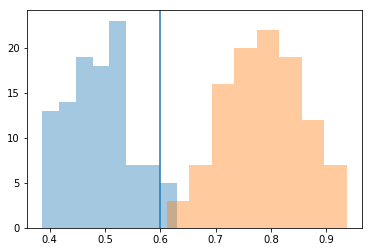

In [20]:
sns.distplot(test_dists, kde=False)
sns.distplot(random_dists, kde=False)
plt.axvline(x=0.6)
plt.show()

In [21]:
pct = percentileofscore(test_dists, 0.6)
mean = np.mean(test_dists)

print("Percent of synthesized images classified as same person at threshold 0.6:", pct, "Average distance (test):", mean)

Percent of synthesized images classified as same person at threshold 0.6: 95.28301886792453 Average distance (test): 0.4890255163266494


We prepare a dataloader for the visualization set, synthesize their images and plot them out

In [22]:
vis_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/vis', size=64, n_hidden=128, train=False), batch_size=8)

In [23]:
vis_images, names = synthesize(model, vis_dataloader, device)

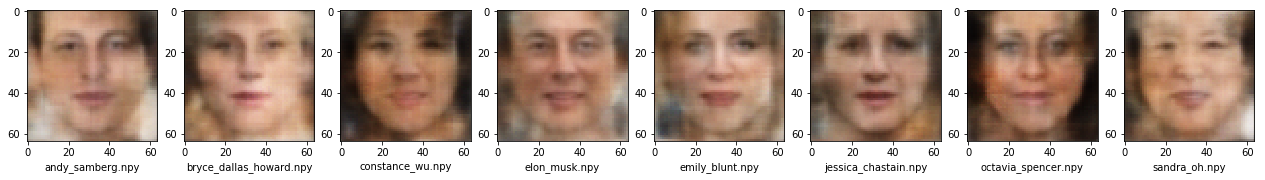

In [24]:
fig, ax = plt.subplots(1,len(vis_images))
fig.set_size_inches(22, 3)

for i in range(len(vis_images)):
    image, name = vis_images[i], names[i]
    ax[i].imshow(image)
    ax[i].set_xlabel(name.split("/")[-1])